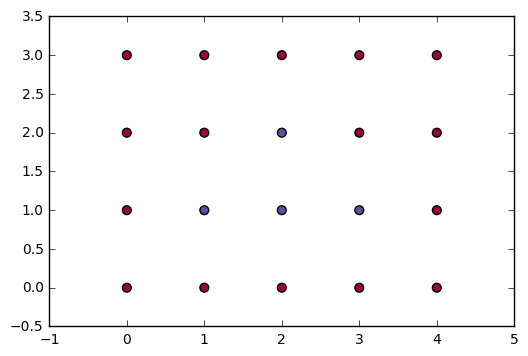

Loss after iteration 0: 0.660666
Loss after iteration 1000: 0.176804
Loss after iteration 2000: 0.146901
Loss after iteration 3000: 0.140011
Loss after iteration 4000: 0.137144
Loss after iteration 5000: 0.135629
Loss after iteration 6000: 0.134717
Loss after iteration 7000: 0.134123
Loss after iteration 8000: 0.133713
Loss after iteration 9000: 0.133416
Loss after iteration 10000: 0.133194
Loss after iteration 11000: 0.133023
Loss after iteration 12000: 0.132888
Loss after iteration 13000: 0.132780
Loss after iteration 14000: 0.132691
Loss after iteration 15000: 0.132618
Loss after iteration 16000: 0.132556
Loss after iteration 17000: 0.132503
Loss after iteration 18000: 0.132458
Loss after iteration 19000: 0.132418


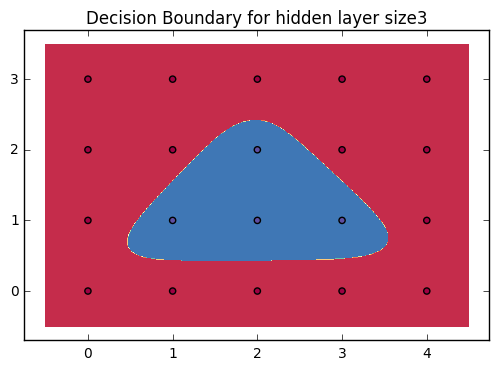

In [3]:
# ML Problem 11
import numpy as np

class MultiplyGate:
    def forward(self,W, X):
        return np.dot(X, W)

    def backward(self, W, X, dZ):
        dW = np.dot(np.transpose(X), dZ)
        dX = np.dot(dZ, np.transpose(W))
        return dW, dX

class AddGate:
    def forward(self, X, b):
        return X + b

    def backward(self, X, b, dZ):
        dX = dZ * np.ones_like(X)
        db = np.dot(np.ones((1, dZ.shape[0]), dtype=np.float64), dZ)
        return db, dX

#Layer


class Sigmoid:
    def forward(self, X):
        return 1.0 / (1.0 + np.exp(-X))

    def backward(self, X, top_diff):
        output = self.forward(X)
        return (1.0 - output) * output * top_diff

class Tanh:
    def forward(self, X):
        return np.tanh(X)

    def backward(self, X, top_diff):
        output = self.forward(X)
        return (1.0 - np.square(output)) * top_diff
#NN
import numpy as np

class Model:
    def __init__(self, layers_dim):
        self.b = []
        self.W = []
        for i in range(len(layers_dim)-1):
            self.W.append(np.random.randn(layers_dim[i], layers_dim[i+1]) / np.sqrt(layers_dim[i]))
            self.b.append(np.random.randn(layers_dim[i+1]).reshape(1, layers_dim[i+1]))

    def calculate_loss(self, X, y):
        mulGate = MultiplyGate()
        addGate = AddGate()
        layer = Tanh()
        softmaxOutput = Softmax()

        input = X
        for i in range(len(self.W)):
            mul = mulGate.forward(self.W[i], input)
            add = addGate.forward(mul, self.b[i])
            input = layer.forward(add)

        return softmaxOutput.loss(input, y)

    def predict(self, X):
        mulGate = MultiplyGate()
        addGate = AddGate()
        layer = Tanh()
        softmaxOutput = Softmax()

        input = X
        for i in range(len(self.W)):
            mul = mulGate.forward(self.W[i], input)
            add = addGate.forward(mul, self.b[i])
            input = layer.forward(add)

        probs = softmaxOutput.predict(input)
        return np.argmax(probs, axis=1)

    def train(self, X, y, num_passes=20000, epsilon=0.01, reg_lambda=0.01, print_loss=False):
        mulGate = MultiplyGate()
        addGate = AddGate()
        layer = Tanh()
        softmaxOutput = Softmax()

        for epoch in range(num_passes):
            # Forward propagation
            input = X
            forward = [(None, None, input)]
            for i in range(len(self.W)):
                mul = mulGate.forward(self.W[i], input)
                add = addGate.forward(mul, self.b[i])
                input = layer.forward(add)
                forward.append((mul, add, input))

            # Back propagation
            dtanh = softmaxOutput.diff(forward[len(forward)-1][2], y)
            for i in range(len(forward)-1, 0, -1):
                dadd = layer.backward(forward[i][1], dtanh)
                db, dmul = addGate.backward(forward[i][0], self.b[i-1], dadd)
                dW, dtanh = mulGate.backward(self.W[i-1], forward[i-1][2], dmul)
                # Add regularization terms (b1 and b2 don't have regularization terms)
                dW += reg_lambda * self.W[i-1]
                # Gradient descent parameter update
                self.b[i-1] += -epsilon * db
                self.W[i-1] += -epsilon * dW

            if print_loss and epoch % 1000 == 0:
                print("Loss after iteration %i: %f" %(epoch, self.calculate_loss(X, y)))

import numpy as np

class Softmax:
    def predict(self, X):
        exp_scores = np.exp(X)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def loss(self, X, y):
        num_examples = X.shape[0]
        probs = self.predict(X)
        corect_logprobs = -np.log(probs[range(num_examples), y])
        data_loss = np.sum(corect_logprobs)
        return 1./num_examples * data_loss

    def diff(self, X, y):
        num_examples = X.shape[0]
        probs = self.predict(X)
        probs[range(num_examples), y] -= 1
        return probs

import matplotlib.pyplot as plt
import numpy as np

# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    
# Main Function

import matplotlib.pyplot as plt
import numpy as np

def main_calling_func():
    X = [0,0,0, 1,0, 2, 0, 3,1 ,0,1,1,1, 2,1, 3,2, 0, 2, 1,2, 2,2, 3,3, 0,3, 1,3, 2,3, 3,4, 0,4, 1,4, 2,4, 3]
    X = np.reshape(X,((len(X)/2), 2))  
    
    y = [0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0]
    y = np.asarray(y)
    
    
    plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
    plt.show()
    
    hidden_layer_units = 4
    layers_dim = [2, hidden_layer_units, 2]
    
    
    
    model = Model(layers_dim)
    model.train(X, y, num_passes=20000, epsilon=0.01, reg_lambda=0.01, print_loss=True)
    
    # Plot the decision boundary
    plot_decision_boundary(lambda x: model.predict(x), X, y)
    plt.title("Decision Boundary for hidden layer size" + str( hidden_layer_units-1))
    plt.show()



def clear_all():
    """Clears all the variables from the workspace of the spyder application."""
    gl = globals().copy()
    for var in gl:
        if var[0] == '_': continue
        if 'func' in str(globals()[var]): continue
        if 'module' in str(globals()[var]): continue

        del globals()[var]

main_calling_func()
clear_all()


The Decison boundary is percfectly obtained when the number of hiddens units are three, depicting the three lines here, i have also used the softmax to make the boundary smoother as comapred to being a triangle.
I ran the Neural Network for 20000 epochs.

The Training examples were taken from the Problem number 3. And also i am including the Hidden Unit Activation graphs.
